# Projeto Python IA: Inteligência Artificial e Previsões

### Case: Score de Crédito dos Clientes

Você foi contratado por um banco para conseguir definir o score de crédito dos clientes. Você precisa analisar todos os clientes do banco e, com base nessa análise, criar um modelo que consiga ler as informações do cliente e dizer automaticamente o score de crédito dele: Ruim, Ok, Bom


In [3]:
# Passo 1: Importar a base de dados 
# Passo 2: Verificar as informações não relevantes e espaços vazios na bd
# Passo 3: Fazer o tratamento na base de dados (a IA lê apenas números)
# Passo 4: Treinar 2 modelos
# Passo 5: Verificar o melhor modelo
# !pip install pandas scikit-learn

In [4]:
import pandas as pd

tabela = pd.read_csv("clientes.csv") #importando base de dados
display(tabela.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id_cliente                100000 non-null  int64  
 1   mes                       100000 non-null  int64  
 2   idade                     100000 non-null  float64
 3   profissao                 100000 non-null  object 
 4   salario_anual             100000 non-null  float64
 5   num_contas                100000 non-null  float64
 6   num_cartoes               100000 non-null  float64
 7   juros_emprestimo          100000 non-null  float64
 8   num_emprestimos           100000 non-null  float64
 9   dias_atraso               100000 non-null  float64
 10  num_pagamentos_atrasados  100000 non-null  float64
 11  num_verificacoes_credito  100000 non-null  float64
 12  mix_credito               100000 non-null  object 
 13  divida_total              100000 non-null  fl

None

In [11]:
# Transformar as informações que estão em "object" para números, pois só assim a IA consegue tratar

from sklearn.preprocessing import LabelEncoder

codificador = LabelEncoder()

# se alguma coluna da tabela for "object", passe ela para números
# só não irei fazer isso na coluna "score_credito" pois ela é o que quero descobrir

for coluna in tabela.columns:
    if tabela[coluna].dtype == "object" and coluna != "score_credito":
        tabela[coluna] = codificador.fit_transform(tabela[coluna])

display(tabela.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id_cliente                100000 non-null  int64  
 1   mes                       100000 non-null  int64  
 2   idade                     100000 non-null  float64
 3   profissao                 100000 non-null  int32  
 4   salario_anual             100000 non-null  float64
 5   num_contas                100000 non-null  float64
 6   num_cartoes               100000 non-null  float64
 7   juros_emprestimo          100000 non-null  float64
 8   num_emprestimos           100000 non-null  float64
 9   dias_atraso               100000 non-null  float64
 10  num_pagamentos_atrasados  100000 non-null  float64
 11  num_verificacoes_credito  100000 non-null  float64
 12  mix_credito               100000 non-null  int32  
 13  divida_total              100000 non-null  fl

None

In [6]:
# Escolher quais colunas utilizar para o modelo
# y é a coluna que queremos que o modelo calcule
# x vai todas as colunas que vamos usar para prever o score, porém vamos retirar as colunas "Id_cliente" e "mes", pois elas não ajudar na previsão

x = tabela.drop(columns=["score_credito", "id_cliente"])
y = tabela["score_credito"]

from sklearn.model_selection import train_test_split

#separei os dados de treino e de treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y)

In [7]:
# Criar a inteligência artificial
# Árvore de Decisão
# KNN -> Vizinhos Próximos

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

modelo_arvore = RandomForestClassifier()
modelo_knn = KNeighborsClassifier()

# Treinar os modelos
modelo_arvore.fit(x_treino, y_treino)
modelo_knn.fit(x_treino, y_treino)




KNeighborsClassifier()

In [8]:
# Previsão
previsão_arvore = modelo_arvore.predict(x_teste)
previsão_knn = modelo_knn.predict(x_teste)

# Testar a Acuárcia (acertividade) dos modelos

from sklearn.metrics import accuracy_score
display(accuracy_score(y_teste, previsão_arvore))
display(accuracy_score(y_teste, previsão_knn))

0.8266

0.74244

In [9]:
tabela_nova = pd.read_csv("novos_clientes.csv")

# Tratando tabela nova
for coluna in tabela_nova.columns:
    if tabela_nova[coluna].dtype == "object" and coluna != "score_credito":
        tabela_nova[coluna] = codificador.fit_transform(tabela_nova[coluna])


display(tabela_nova)

previsoes = modelo_arvore.predict(tabela_nova)
display(previsoes)




,mes,idade,profissao,salario_anual,num_contas,num_cartoes,juros_emprestimo,num_emprestimos,dias_atraso,num_pagamentos_atrasados,...,taxa_uso_credito,idade_historico_credito,investimento_mensal,comportamento_pagamento,saldo_final_mes,emprestimo_carro,emprestimo_casa,emprestimo_pessoal,emprestimo_credito,emprestimo_estudantil
0,1,31.0,1,19300.340,6.0,7.0,17.0,5.0,52.0,19.0,...,29.934186,218.0,44.50951,1,312.487689,1,1,0,0,0
1,4,32.0,0,12600.445,5.0,5.0,10.0,3.0,25.0,18.0,...,28.819407,12.0,0.00000,2,300.994163,0,0,0,0,1
2,2,48.0,1,20787.690,8.0,6.0,14.0,7.0,24.0,14.0,...,34.235853,215.0,0.00000,0,345.081577,0,1,0,1,0


array(['Poor', 'Good', 'Standard'], dtype=object)

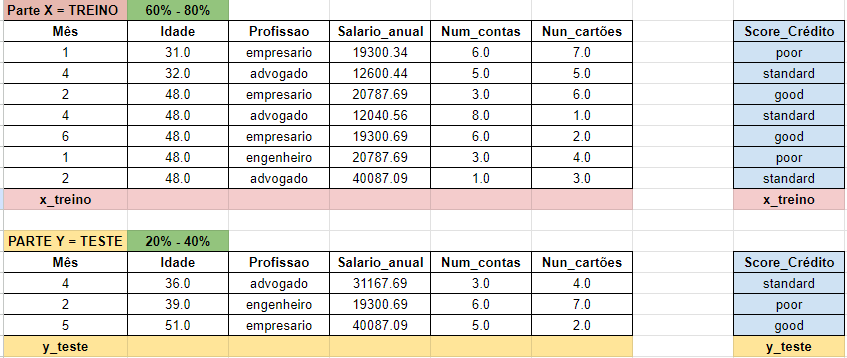